In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Notes

* `merge()`: Combine DataFrames based on common columns or indices, similar to SQL joins (inner, outer, left, right).
* It merges rows from the DataFrame based on the specific keys.


* `merge()`: SQL birleştirmelerine benzer şekilde ortak sütunlara veya dizinlere dayalı olarak DataFrame'leri birleştirir (iç, dış, sol, sağ).
* DataFrame'den satırları belirli anahtarlara dayalı olarak birleştirir.

## Examples

### Example 1

We need to combine two DataFrames:
- `df_jobs` has info similiar to our `df` DataFrame
- `df_companies` has company info

### 📦 Ne Yapıldı?
1.  İki adet Python sözlüğü (dict) tanımlandı:
* job_data: İş ilanlarına ait bilgiler içeriyor
* company_data: Şirket bilgilerini içeriyor

In [3]:
import pandas as pd 
job_data = {
    "job_id" : [1,2,3,4,5],
    "job_title" : ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    "company_name" : ["Google", "Microsoft", "Apple", "Nike", "Starbucks"],
    "job_location" : ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    "company_name" : ["Google", "Microsoft", "Apple", "Nike", "Starbucks"],
    "industry" : ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    "company_size" : ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

df_jobs = pd.DataFrame(job_data) #pandas df lere dönüştürüldü. Sözlükleri tablolara (DataFrame) çevirdi. Artık veriler üzerinde Pandas işlemleri (merge, groupby, filtreleme vs.) yapılabilir.
df_companies = pd.DataFrame(company_data) 

df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [4]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


##### Bonus:
Eğer on="job_id" yazsaydın hata alırdın çünkü df_companies'ta job_id sütunu yok ❌


In [5]:
#merge the two datasets on the "job_id" column 
df_job_company = df_jobs.merge(df_companies, on="company_name") #company_name sütununa göre birleştirdi (SQL de JOIN gibi)
df_job_company

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [6]:
#merge the two datasets on the "job_id" column 
df_job_company = df_companies.merge(df_jobs, on="company_name") #company_name sütununa göre birleştirdi (SQL de JOIN gibi)
df_job_company

,company_name,industry,company_size,job_id,job_title,job_location
0,Google,Technology,"100,000+",1,Data Scientist,"Mountain View, CA"
1,Microsoft,Technology,"100,000+",2,Software Engineer,"Redmond, WA"
2,Apple,Technology,"100,000+",3,Product Manager,"Cupertino, CA"
3,Nike,Apparel,"75,000+",4,Marketing Director,"Beaverton, OR"
4,Starbucks,Food & Beverage,"346,000+",5,HR Manager,"Seattle, WA"


### Example 2

The data we have is only for data science job postings, but what if we wanted to combine insights with other job industries?

Recall the pivot we previously made:

In [7]:
df_US = df[df["job_country"] == "United States"].copy()
df_US["job_posted_month"] = df_US["job_posted_date"].dt.strftime("%B") #job_posted_date sütunundan sadece ayın adı (örnek: "January", "February") alınıyor.
df_US_pivot = df_US.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size") #Satırlar: Ay isimleri, Sütunlar: Pozisyon türleri,Hücre: O ay o pozisyon için kaç ilan var
df_US_pivot = df_US_pivot.reset_index() #job_posted_month artık index değil, tekrar normal sütun haline geliyor., Bunu yapma sebebi: sıralamak için!
df_US_pivot["job_posted_month_no"] = pd.to_datetime(df_US_pivot["job_posted_month"], format="%B").dt.month #"January" → 1, "February" → 2 şeklinde bir sıralama numarası sütunu ekleniyor.
df_US_pivot = df_US_pivot.sort_values("job_posted_month_no") #aylar alfabetik değil, doğal takvim sırasına göre diziliyor: Jan, Feb, Mar, ...
df_US_pivot = df_US_pivot.set_index("job_posted_month") #Ay isimleri (örnek: "March") artık tablo index’i oluyor. Görsel ve analiz açısından okunabilirlik artıyor.
df_US_pivot = df_US_pivot.drop(columns="job_posted_month_no") #işe yaramayan sütunlar siliniyor
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


Let's make some fake data for this.

**NOTE: The code here is not important for you to understand**.

### 🎯 AMAÇ:

12 ay boyunca, farklı yazılım pozisyonları için rastgele maaş verisi üretmek ve bu verileri pivot tablo gibi organize etmek.

In [8]:
import random 
import pandas as pd

# Set seed for reproducibility
random.seed(42) # Aynı kodu her çalıştırdığında aynı rastgele değerlerin oluşması için.

#Define job_titles
job_titles = ["Front-End Developer", "Back-End Developer", "Full-Stack Developer", "UI/UX Designer"]

# Define months

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September","October", "November", "December"]

# Define ranges for random data
ranges = { #maaş aralıkları
    "Front-End Developer" : (11000, 15000),
    "Back-End Developer" : (8000, 10000),
    "Full-Stack Developer" : (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}
# Generate random data

#Ne yapıyor bu?
#Her job_title için bir liste oluşturuluyor. -- Bu listede 12 tane rastgele maaş değeri var → her biri bir ayı temsil ediyor. -- Bu veriler data adlı sözlükte tutuluyor.
data={}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# create dataframes
#Bu, pivot tabloya benzer bir tablo oluşturur. -Satırlar = Aylar - Sütunlar = Pozisyonlar - Hücre = Rastgele maaş değeri
df_US_software_pivot = pd.DataFrame(data, index=months)
df_US_software_pivot.index.name = "job_posted_month"

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


### ✅ Ne İşe Yarar?

Bu tabloyu kullanarak:

1. Her ay en çok maaş alan pozisyonu görebilirsin
2. Pozisyonlara göre maaş trendi oluşturabilirsin (grafik)
3. Aylar arasında karşılaştırma yapabilirsin

### 🎯 Kısaca

| Amaç                       | Ne yapıldı?                              |
|----------------------------|------------------------------------------|
| 12 ay için rastgele veri   | `random.randint(...)`                    |
| Pozisyonları kolon yapmak  | `data[job_title] = ...`                  |
| Pivot yapıda tablo oluştur | `pd.DataFrame(data, index=months)`      |


In [9]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [10]:
# Well we can combine these using merge:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on="job_posted_month")
df_US_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [11]:
#And now we can plot it!
# find top 5 job_titles(columns) in df_US_merged

top_5 = df_US_merged.sum().sort_values(ascending=False).head().index
top_5 = top_5.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

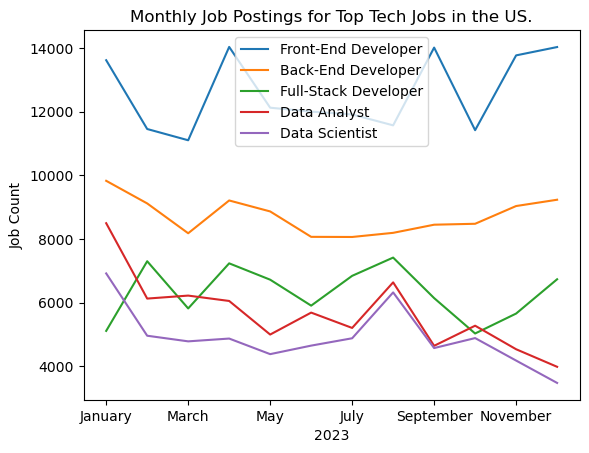

In [12]:
df_US_merged[top_5].plot(kind="line")
plt.title("Monthly Job Postings for Top Tech Jobs in the US.")
plt.xlabel("2023")
plt.ylabel("Job Count")
plt.legend()
plt.show()

### Example 3

Now looking at our dataset. Let's create two DataFrames. 
* The first one will get the count of Data Analyst jobs by month.
* The second one will (similarly) get the count of Senior Data Analyst jobs by month.

Finally, we will merge these two DataFrames to easily compare the demand for Data Analyst vs Senior Data Analyst jobs.

1. Create a new DataFrame that only gets Data Analyst jobs, creates a column for the month, and get the job postings by month.

In [13]:
## Filter for Data Analysts 
df_DA = df[(df['job_title_short'] == 'Data Analyst')].copy()

## Create a column for month
df_DA["month"] = df_DA["job_posted_date"].dt.month

## Pivot table to count job postings by month
df_DA_pivot = df_DA.pivot_table(index="month", aggfunc="count")["job_title_short"]

df_DA_pivot

month
1     23585
2     16558
3     16243
4     15514
5     13423
6     16008
7     16095
8     18628
9     14969
10    16239
11    15230
12    13583
Name: job_title_short, dtype: int64

2. Create a new DataFrame that only gets Senior Data Analyst jobs, creates a column for the month, and get the job postings by month.

In [14]:
## Filter for Senior Data Analysts 
df_SDA = df[(df["job_title_short"]== "Senior Data Analyst")].copy()

## Create a column for month
df_SDA["month"] = df_SDA["job_posted_date"].dt.month

## Pivot table to count job postings by month
df_SDA_pivot = df_SDA.pivot_table(index="month", aggfunc="count")["job_title_short"]

df_SDA_pivot

month
1     3696
2     2713
3     2454
4     2351
5     1925
6     2319
7     2380
8     2951
9     2194
10    2317
11    2117
12    1799
Name: job_title_short, dtype: int64

3. Finally, we'll merge the two pivot tables together.

In [15]:
## Merge the two pivot tables
merged_DA_pivot = pd.merge(df_DA_pivot, df_SDA_pivot, how="outer", left_index=True, right_index=True) # how="outer", Her iki tabloda da olan tüm indeksler (aylar) korunur.- Eğer bir tabloda o ay yoksa, NaN (eksik) olarak gelir.
merged_DA_pivot.columns = ["DA_count", "SDA_count"] #kolon isimleri yeniden adlandırılıyor
merged_DA_pivot

,DA_count,SDA_count
month,,
1,23585,3696
2,16558,2713
3,16243,2454
4,15514,2351
5,13423,1925
6,16008,2319
7,16095,2380
8,18628,2951
9,14969,2194


### 🧠 Ne İşe Yarar?

1. Hangi pozisyon daha fazla ilan almış?
2. Hangi ayda sadece bir pozisyon vardı?
3. Zaman içinde artış veya düşüşleri yan yana görebilmek

#### ✅ Kısaca:

 | İşlem                        | Açıklama                                              |
 |-----------------------------|-------------------------------------------------------|
 | merge(..., left_index=True) | İki pivot tabloyu satır indeksine göre birleştirir   |
 | how="outer"                 | Her iki tablodaki tüm ayları dahil eder (NaN olabilir)|
 | columns = [...]             | Anlamlı kolon isimleri atanır                        |


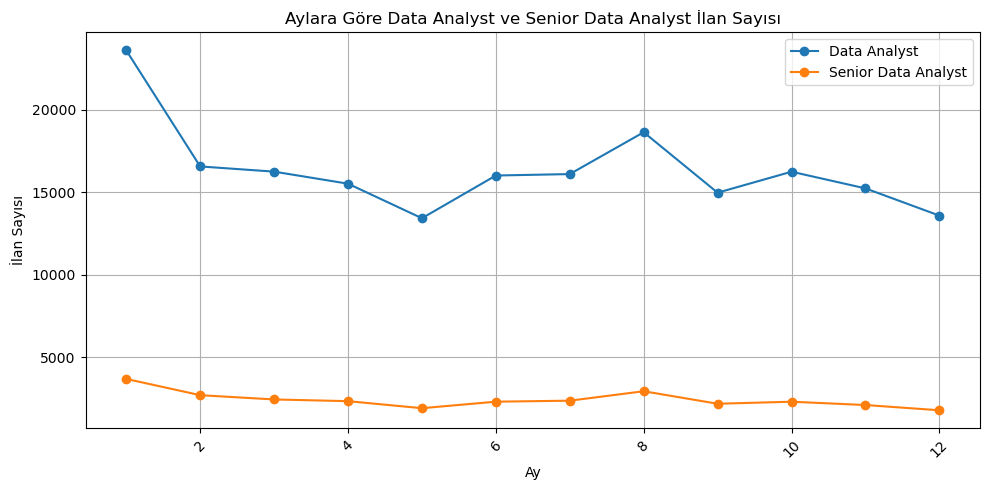

In [18]:
import matplotlib.pyplot as plt

# Grafik boyutu ayarla
plt.figure(figsize=(10, 5))

# DA ve SDA ilan sayılarını çiz
merged_DA_pivot["DA_count"].plot(kind="line", marker="o", label="Data Analyst")
merged_DA_pivot["SDA_count"].plot(kind="line", marker="o", label="Senior Data Analyst")

# Grafik başlığı ve etiketler
plt.title("Aylara Göre Data Analyst ve Senior Data Analyst İlan Sayısı")
plt.xlabel("Ay")
plt.ylabel("İlan Sayısı")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Grafik göster
plt.tight_layout()
plt.show()


#### 📌 merge() Nedir?

* İki veya daha fazla DataFrame’i, ortak bir sütuna göre birleştirir.
* SQL’deki INNER JOIN, LEFT JOIN, RIGHT JOIN, OUTER JOIN işlemleriyle aynıdır.

#### 🧠 Ne İşe Yarar?

* Farklı tablolarda yer alan ama ilişkili verileri birleştirerek tek tablo oluşturmanı sağlar.
* Veri analizi yaparken genellikle bilgiler parça parçadır ve birleştirmen gerekir (örnek: müşteri bilgileri + sipariş bilgileri).

DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
* Merge DataFrame or named Series objects with a database-style join.

| JOIN Türü     | Açıklama                                          | Kod Örneği                                      |
|:--------------|:--------------------------------------------------|:------------------------------------------------|
| inner         | Sadece her iki tabloda ortak olanları getirir     | pd.merge(df1, df2, on='MüşteriID', how='inner') |
| left          | Sol tablodaki tüm veriler, sağdan eşleşenler      | pd.merge(df1, df2, on='MüşteriID', how='left')  |
| right         | Sağ tablodaki tüm veriler, soldan eşleşenler      | pd.merge(df1, df2, on='MüşteriID', how='right') |
| outer         | Her iki tablonun birleşimi, eşleşmeyenler NaN     | pd.merge(df1, df2, on='MüşteriID', how='outer') |



### Merge
1. Merging with Pandas works pretty much the same as SQL. So if you have SQL experience and you only need to know the Python syntax, you can scroll through this.

2. When you're working on a data science project, you'll often start from multiple data tables that have various bits of information that you would like to see all in one place. Unfortunately, simply copying and pasting rows of data onto each other just isn't the way it works. Merge is an important tool to have because it allows you to efficiently combine data tables together in a nice and orderly fashion. In this tutorial we're starting from multiple data tables in the form of CSV files. So take a moment to look at the data we'll be using.

3. Understanding Merge
Let's begin with a basic line of code that merges two dataframes into one. With this command we're collecting all the rows of data from both dataframes and lining them up based on values in "some_column" that are common to both dataframes.

pd.merge(left_dataframe, right_dataframe, on="some_column", how="left|right|inner|outer)`
* A LEFT dataframe is whichever one you type first.
* A RIGHT dataframe is whichever one you type second.
* "on" is the column or list of columns that determine which rows from one table match to which rows in the second table. Sometimes the columns you want to merge on have different names in the dataframes. For example, maybe one dataframe calls it RecordID while the other dataframe calls it RowID even though they are really the same ID. In those cases you can specify the column names separately for each dataframe using the "left_on" and "right_on" arguments.
"how" is the method to use, by default Pandas uses the "inner" method.